# Opción uno

## Para un solo activo

In [12]:
#Importamos la líbrerías necesarias
#Manipulación de datos
import numpy as np
import pandas as pd

#Gráficas
import matplotlib.pyplot as plt
import seaborn
import matplotlib.mlab as mlab

#Cálculos estadísticos
from scipy.stats import norm

#Obtención de información
import yfinance as yf

#Tabular data output
from tabulate import tabulate

In [13]:
#Obtener los datos de Yahoo! Finance
df = yf.download('FB', '2012-01-01', '2018-01-31')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...
2018-01-25,187.949997,188.619995,186.600006,187.479996,187.479996,17377700
2018-01-26,187.750000,190.000000,186.809998,190.000000,190.000000,17759200
2018-01-29,188.750000,188.839996,185.630005,185.979996,185.979996,20453200


In [14]:
#Calcular los rendimientos
df['returns'] = df['Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400,NaN
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700,-0.109861
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600,-0.089039
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000,0.032258
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200,0.032187
...,...,...,...,...,...,...,...
2018-01-25,187.949997,188.619995,186.600006,187.479996,187.479996,17377700,0.004985
2018-01-26,187.750000,190.000000,186.809998,190.000000,190.000000,17759200,0.013441
2018-01-29,188.750000,188.839996,185.630005,185.979996,185.979996,20453200,-0.021158


In [15]:
#Calcular la media y desviación estándar de los rendimientos
mean    = np.mean(df['returns'])
std_dev = np.std(df['returns'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:316: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(values, bins=bins, **kwds)


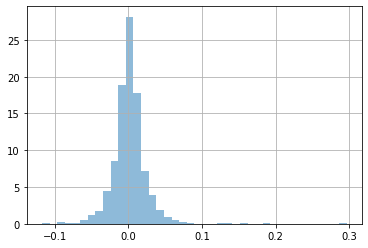

In [16]:
#Hacemos la gráfica de los rendimientos dy de una normal estándar
df['returns'].hist(bins=40, normed = True, histtype = 'stepfilled', alpha=0.5)
#x= np.linspace(mean -3*std_dev, mean+3*std_dev, 100)
#plt.plot(x, mlab.density(x, mean, std_dev), "r")
#plt.show

In [17]:
#Cálculo del VaR para niveles de confianza del 90,95,99
var_90 =norm.ppf(1-0.9, mean, std_dev)
var_95 =norm.ppf(1-0.95, mean, std_dev)
var_99 =norm.ppf(1-0.99, mean, std_dev)

print(tabulate([['90%', var_90], ['95%', var_95],['99%', var_99]], headers = ["Confidence level", "Value at Risk"]))

Confidence level      Value at Risk
------------------  ---------------
90%                      -0.0284687
95%                      -0.0369281
99%                      -0.0527964


## Para muchos activos

In [19]:
#Librerías requeridas
import numpy as np
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from matplotlib import style

In [20]:
#Extending the Dataset to 5 different assets, combining them into a Portfolio with alternative exposures.
tickers = ["WIKI/BAC.4", "WIKI/AAPL.4", "WIKI/NKE.4", "WIKI/NFLX.4", "WIKI/AMZN.4"]
exposures = [1000000, 400000, 3000000, 200000, 10000000]
df = quandl.get(tickers, start_date="2010-12-31", end_date="2018-12-31", collapse="daily")

In [21]:
#Returns computation
percentage = df.pct_change()

In [22]:
#Different Dollar Exposures into Portfolio
value_ptf = percentage * exposures
value_ptf['Value of Portfolio'] = value_ptf.sum(axis=1)

In [23]:
print(value_ptf)

            WIKI/BAC - Close  WIKI/AAPL - Close  WIKI/NKE - Close  \
Date                                                                
2010-12-31               NaN                NaN               NaN   
2011-01-03      63718.140930        8692.956349      23530.789042   
2011-01-04       3523.608175        2087.568650     -73876.176095   
2011-01-05      18258.426966        3272.057714      19649.874955   
2011-01-06      -4137.931034        -323.353293     -26975.863701   
...                      ...                ...               ...   
2018-03-21      -3439.649781       -9061.858023     -20209.580838   
2018-03-22     -41418.261688       -5663.572138     -87264.506405   
2018-03-23     -45171.849427       -9251.088276       9779.571562   
2018-03-26      43537.881385       18988.723172      58950.951570   
2018-03-27     -30223.390276      -10256.410256      12291.350531   

            WIKI/NFLX - Close  WIKI/AMZN - Close  Value of Portfolio  
Date                           

In [24]:
ptf_percentage = value_ptf['Value of Portfolio']
ptf_percentage = ptf_percentage.sort_values(axis=0, ascending=True)

In [25]:
VaR =  np.percentile(ptf_percentage, .01)
VaR1 =  np.percentile(ptf_percentage, 1)
VaR2 =  np.percentile(ptf_percentage, 5)

print ("99.99% Actual loss won't exceedd: " + str(round(VaR, 2)))
print ("99% Actual loss won't exceed: " + str(round(VaR1, 2)))
print ("95% Actual loss won't exceed: " + str(round(VaR2, 2))) 
print ("Losses expected to exceed " + "{0:.2f}".format(VaR2) + " " + str(.05*len(ptf_percentage)) + " out of " + str(len(ptf_percentage)) + " days")
percentage = percentage[1:]

99.99% Actual loss won't exceedd: -1841650.69
99% Actual loss won't exceed: -665155.08
95% Actual loss won't exceed: -340265.51
Losses expected to exceed -340265.51 91.0 out of 1820 days


https://programmingforfinance.com/2018/04/value-at-risk-via-variance-covariance-method/

https://financetrain.com/analytical-approach-to-calculating-var-variance-covariance-method/

https://study.com/academy/lesson/variance-covariance-method-for-calculating-value-at-risk.html
    

http://firsttimeprogrammer.blogspot.com/2015/01/portfolio-var-with-python.html
